In [92]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


%matplotlib inline

In [2]:
auto_df = data('mpg')

In [3]:
auto_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
auto_df.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [5]:
auto_df.describe(include=['object', 'bool'])

,manufacturer,model,trans,drv,fl,class
count,234,234,234,234,234,234
unique,15,38,10,3,5,7
top,dodge,caravan 2wd,auto(l4),f,r,suv
freq,37,11,83,106,168,62


In [6]:
pandas_profiling.ProfileReport(auto_df)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Number of variables,12
Number of observations,234
Total Missing (%),0.0%
Total size in memory,22.0 KiB
Average record size in memory,96.3 B
Numeric,3
Categorical,6
Boolean,1
Date,0
Text (Unique),0
Rejected,2


In [11]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

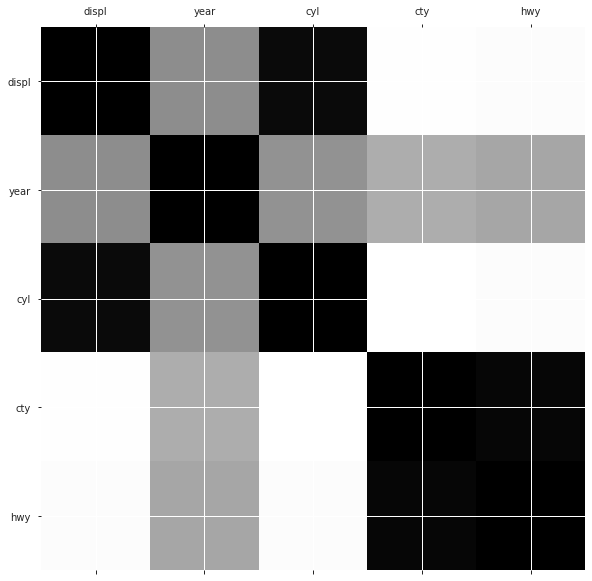

In [12]:
plot_corr(auto_df)

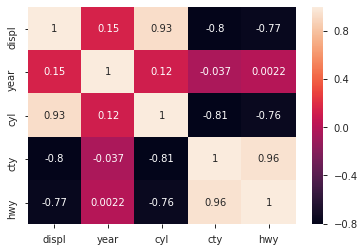

In [16]:
sns.heatmap(auto_df.corr(), annot=True)
plt.show()

In [30]:
cat_columns = ['manufacturer','drv']
autoSmallDF = auto_df[cat_columns]

In [19]:
autoSmallDF.describe()

,manufacturer,drv
count,234,234
unique,15,3
top,dodge,f
freq,37,106


In [20]:
autoSmallDF.head()

,manufacturer,drv
1,audi,f
2,audi,f
3,audi,f
4,audi,f
5,audi,f


# Label Encoding

In [54]:
autoSmallDF = auto_df[cat_columns]
le_make = LabelEncoder()
le_drive = LabelEncoder()
autoSmallDF['make_encoded'] = le_make.fit_transform(autoSmallDF.manufacturer)
autoSmallDF['drive_encoded'] = le_drive.fit_transform(autoSmallDF.drv)
autoSmallDF.tail()

/home/jbslanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jbslanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,manufacturer,drv,make_encoded,drive_encoded
230,volkswagen,f,14,1
231,volkswagen,f,14,1
232,volkswagen,f,14,1
233,volkswagen,f,14,1
234,volkswagen,f,14,1


#  One-Hot Enoding: pandas.get_dummies

In [36]:
df_processed = pd.get_dummies(autoSmallDF, prefix_sep="__",columns=cat_columns)

In [39]:
df_processed

,manufacturer__audi,manufacturer__chevrolet,manufacturer__dodge,manufacturer__ford,manufacturer__honda,manufacturer__hyundai,manufacturer__jeep,manufacturer__land rover,manufacturer__lincoln,manufacturer__mercury,manufacturer__nissan,manufacturer__pontiac,manufacturer__subaru,manufacturer__toyota,manufacturer__volkswagen,drv__4,drv__f,drv__r
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# One-Hot Encoding: scikit-learn

In [44]:
autoSmallDF = auto_df[cat_columns]
le_make = LabelEncoder()
le_drive = LabelEncoder()
autoSmallDF['make_encoded'] = le_make.fit_transform(autoSmallDF.manufacturer)
autoSmallDF['drive_encoded'] = le_drive.fit_transform(autoSmallDF.drv)
autoSmallDF.tail()

/home/jbslanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/jbslanka/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,manufacturer,drv,make_encoded,drive_encoded
230,volkswagen,f,14,1
231,volkswagen,f,14,1
232,volkswagen,f,14,1
233,volkswagen,f,14,1
234,volkswagen,f,14,1


In [45]:
make_ohe = OneHotEncoder()
drive_ohe = OneHotEncoder()
Xm = make_ohe.fit_transform(autoSmallDF.make_encoded.values.reshape(-1,1)).toarray()
Xd = drive_ohe.fit_transform(autoSmallDF.drive_encoded.values.reshape(-1,1)).toarray()

/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/jbslanka/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".


In [47]:
dfOneHot = pd.DataFrame(Xm, columns = ["Make_"+str(int(i)) for i in range(Xm.shape[1])])
autoSmallDF = pd.concat([autoSmallDF, dfOneHot], axis=1)

dfOneHot = pd.DataFrame(Xd, columns = ["drive_"+str(int(i)) for i in range(Xd.shape[1])])
autoSmallDF = pd.concat([autoSmallDF, dfOneHot], axis=1)

In [51]:
autoSmallDF

,manufacturer,drv,make_encoded,drive_encoded,Make_0,Make_1,Make_2,Make_3,Make_4,Make_5,...,Make_8,Make_9,Make_10,Make_11,Make_12,Make_13,Make_14,drive_0,drive_1,drive_2
0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,audi,f,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,audi,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,audi,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Dummy Encoding

In [53]:
df_processed = pd.get_dummies(auto_df[cat_columns], prefix_sep="__",columns=cat_columns, drop_first=True)
df_processed

,manufacturer__chevrolet,manufacturer__dodge,manufacturer__ford,manufacturer__honda,manufacturer__hyundai,manufacturer__jeep,manufacturer__land rover,manufacturer__lincoln,manufacturer__mercury,manufacturer__nissan,manufacturer__pontiac,manufacturer__subaru,manufacturer__toyota,manufacturer__volkswagen,drv__f,drv__r
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Hashing

In [80]:
model_columns = ['model']
autoModelDF = auto_df[model_columns]

from sklearn.feature_extraction import FeatureHasher

fh = FeatureHasher(n_features=6, input_type='string')
hashed_features = fh.fit_transform(autoModelDF['model'])
hashed_features = hashed_features.toarray()
hf_df = pd.DataFrame(hashed_features)
hf_df.index += 1  # index started at 1 for autoModelDF, but 0 for the hashedfeatures, correct offset
autoModelDF = pd.concat([autoModelDF, hf_df], axis=1)
autoModelDF.head()


,model,0,1,2,3,4,5
1,a4,0.0,0.0,0.0,0.0,0.0,0.0
2,a4,0.0,0.0,0.0,0.0,0.0,0.0
3,a4,0.0,0.0,0.0,0.0,0.0,0.0
4,a4,0.0,0.0,0.0,0.0,0.0,0.0
5,a4,0.0,0.0,0.0,0.0,0.0,0.0


# Binary encoding / Hash Value

Can also be applied is NaN, is missing

In [94]:
autoModelCountDF = auto_df[['manufacturer','year','cty','drv']]
autoModelCountDF["is_front_wheel_drive"] = np.where(autoModelCountDF["drv"].str.contains("f"), 1,0)
autoModelCountDF.head()

,manufacturer,year,cty,drv,is_front_wheel_drive
1,audi,1999,18,f,1
2,audi,1999,21,f,1
3,audi,2008,20,f,1
4,audi,2008,21,f,1
5,audi,1999,16,f,1
